# Classifying skin lesions using a convolutional neural network

The goal of this assignment is to design and implement a deep learning model able to determine the category of a skin lesion given a dermoscopic image of the lesion.

This report is organized as follows:

1. [**Data exploration**](#Data-exploration)
1. [**(brief) Literature review**](#Literature-review)
1. [**Experiment design**](#Experiment-design)
1. [**Implementation details**](#Implementation-details)
1. [**Results**](#Results)
1. [**Conclusions**](#Conclusions)

## Data exploration

#### Imports

In [3]:
%matplotlib inline

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [32]:
import os
import sys

In [7]:
import numpy as np

In [27]:
import torchvision.transforms as transforms
import PIL

In [33]:
# Add parent folder to system path to allow loading modules
sys.path.append("..")

Set up folders

In [8]:
DATA_FOLDER = "../data"
ANNOTATION_FILE_NAME = "HAM10000_metadata.csv"
LABEL_COLUMN = 'dx'

### Read annotations

In [9]:
annotation_df = pd.read_csv(os.path.join(DATA_FOLDER, ANNOTATION_FILE_NAME))

In [10]:
annotation_df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

In [25]:
# Use sample to get a bit more varied set of examples
annotation_df.sample(frac=1.0).head(n=15)

,lesion_id,image_id,dx,dx_type,age,sex,localization
2364,HAM_0003862,ISIC_0032775,vasc,histo,45.0,male,upper extremity
9867,HAM_0000688,ISIC_0026720,akiec,histo,75.0,male,lower extremity
6962,HAM_0000230,ISIC_0032150,nv,histo,50.0,female,lower extremity
875,HAM_0003881,ISIC_0031893,bkl,consensus,70.0,female,face
5479,HAM_0003292,ISIC_0029173,nv,follow_up,65.0,male,abdomen
560,HAM_0006240,ISIC_0030188,bkl,histo,80.0,male,upper extremity
4524,HAM_0004626,ISIC_0026904,nv,follow_up,55.0,male,upper extremity
1800,HAM_0002841,ISIC_0032982,mel,histo,20.0,male,back
5335,HAM_0002270,ISIC_0031607,nv,follow_up,45.0,female,lower extremity
1533,HAM_0000321,ISIC_0032733,mel,histo,70.0,male,back


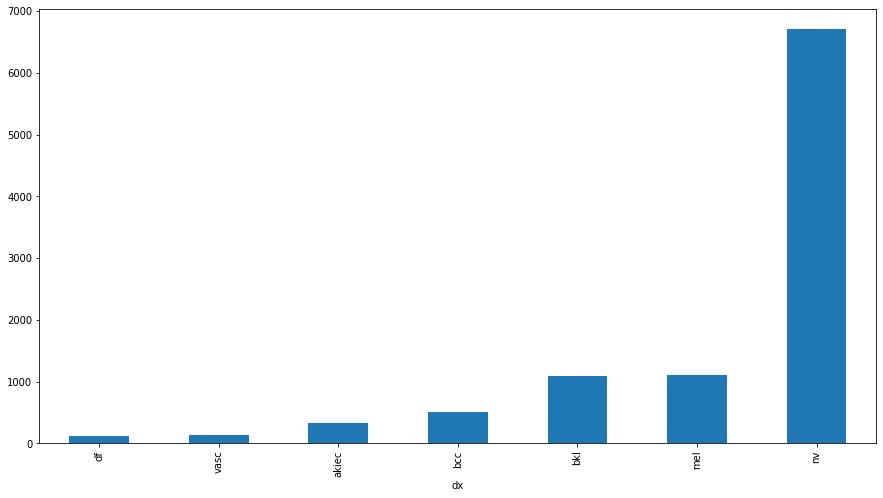

In [9]:
plt.figure(figsize=(15,8))
annotation_df.groupby(LABEL_COLUMN).count()['sex'].sort_values().plot(kind='bar')

In [10]:
annotation_df.groupby(LABEL_COLUMN)['age'].describe()

,count,mean,std,min,25%,50%,75%,max
dx,,,,,,,,
akiec,327.0,66.529052,11.476232,30.0,60.0,70.0,75.0,85.0
bcc,514.0,66.828794,13.656959,20.0,60.0,70.0,75.0,85.0
bkl,1089.0,64.283747,14.120715,0.0,55.0,65.0,75.0,85.0
df,115.0,53.043478,13.551326,25.0,45.0,50.0,65.0,80.0
mel,1111.0,60.679568,15.189847,5.0,50.0,60.0,70.0,85.0
nv,6660.0,46.477477,15.183275,0.0,35.0,45.0,55.0,85.0
vasc,142.0,51.373239,21.644651,0.0,40.0,55.0,70.0,85.0


### View sample images

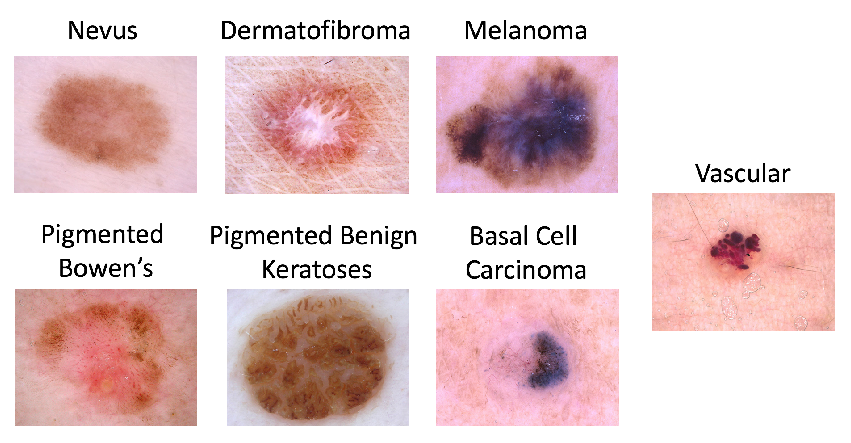

In [29]:
sample_image = plt.imread("../lesions.png")
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(sample_image);

Display a few images from the dataset on a grid in order to visually check their characteristics

In [34]:
from lib.dataset import HAM10000, create_train_val_split, read_meta_data

In [35]:
train_ids, val_ids = create_train_val_split(DATA_FOLDER, 0.8, 0.2)

In [68]:
# Order so that classes that get confused are shown close to one another
class_labels = ['akiec', 'bkl', 'bcc', 'df', 'mel', 'nv', 'vasc']

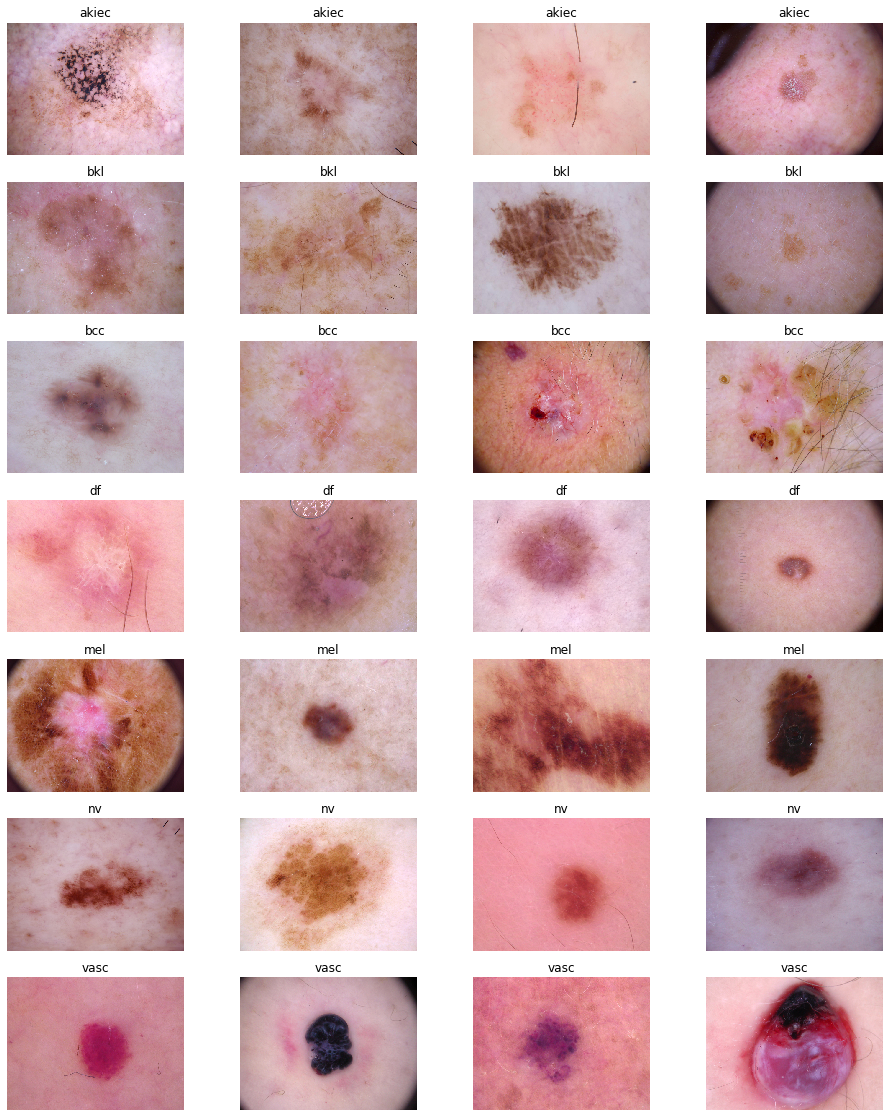

In [77]:
n_rows = len(class_labels)
n_cols = 4

f, axes = plt.subplots(n_rows, n_cols, figsize=(16, 20))

for x, l in enumerate(class_labels):
    samples4 = annotation_df[(annotation_df['dx'] == l)].sample(frac=1.0).iloc[:4]
    for y, im_id in enumerate(samples4['image_id']):
        img = plt.imread(os.path.join(DATA_FOLDER, "{}.jpg".format(im_id)))
        axes[x, y].axis('off')
        axes[x, y].imshow(img)
        axes[x, y].set_title(l)

## Literature review

https://arxiv.org/pdf/1812.02316.pdf

## Experiment design

The auxiliary function used to produce the training/validation splits takes a seed for the random number generator as input.

### Data augmentation

### Monitoring experiments

Tensorboard

#### Metrics

* Training/Validation Loss
* Training/Validation Accuracy
* Class specific metrics:
    * Precision
    * Recall
    * ROC AUC
    

In [ ]:
sys.path.append("..")
from main import get_data_augmentation_transforms

## Implementation details

## Results

Experiments have been performed on a PC with the following specs:

 * **CPU**: Intel(R) Core(TM) i7-9700K CPU @ 3.60GHz
 * **RAM**: 32 GB
 * **OS**: Ubuntu 18.04
 * **GPU**: NVIDIA RTX 2080 TI GPU
 
Each "epoch" (considering both training and the forward pass on the whole validation set) took roughly 2:35.

## Conclusions

### Future work

* Use additional data from other datasets
* Include additional information (age) however be sure not to fixate on that...
* Choose different values for the learning rate of layers deeper in the network (as opposed to those in the first layers)